In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Load the data and explore it!

In [4]:
df = pd.read_csv(str(Path(r'./Data/BS_training.csv')))

In [5]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [6]:
df['Stock Price'] = df['Stock Price'] / df['Strike Price']
df['Call Price'] = df['Call Price'] / df['Strike Price']
df['Strike Price'] = df['Strike Price'] / df['Strike Price']

In [7]:
df.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,1.062237,1.0,1.093151,0.005674,0.862692,0.058898,0.408642
1,1.076500,1.0,0.843836,0.020428,0.759562,0.080634,0.337843
2,0.849812,1.0,1.326027,0.019181,0.606436,0.042031,0.187719
3,0.904815,1.0,0.791781,0.028475,0.572696,0.036566,0.146312
4,0.859547,1.0,0.501370,0.009074,0.090578,0.044426,0.000397


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Stock Price   300000 non-null  float64
 1   Strike Price  300000 non-null  float64
 2   Maturity      300000 non-null  float64
 3   Dividends     300000 non-null  float64
 4   Volatility    300000 non-null  float64
 5   Risk-free     300000 non-null  float64
 6   Call Price    300000 non-null  float64
dtypes: float64(7)
memory usage: 16.0 MB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Stock Price,300000.0,1.031697,0.185779,7.692309e-01,0.868780,0.999826,1.176731,1.428564
Strike Price,300000.0,1.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
Maturity,300000.0,1.498297,0.865052,2.739726e-03,0.747945,1.495890,2.246575,2.997260
Dividends,300000.0,0.014981,0.008652,6.189318e-08,0.007513,0.014967,0.022485,0.030000
Volatility,300000.0,0.475337,0.245782,5.000154e-02,0.262196,0.475770,0.688666,0.899994
Risk-free,300000.0,0.054975,0.025971,1.000020e-02,0.032487,0.055035,0.077461,0.099999
Call Price,300000.0,0.267430,0.178274,0.000000e+00,0.122820,0.250488,0.388795,0.933013


We dont do any kind of EDA here, since the data is simulated and regular. Nothing to explore here!

### Split the data into test-train

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Call Price', axis=1).values
y = df['Call Price'].values

In [12]:
X.shape, y.shape

((300000, 6), (300000,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(6,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________


In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=6)

In [62]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=100, 
          callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 240000 samples, validate on 60000 samples
Epoch 1/100
240000/240000 [==============================] - 5s 22us/sample - loss: 2.5190e-04 - val_loss: 7.3496e-06
Epoch 2/100
240000/240000 [==============================] - 5s 20us/sample - loss: 2.4286e-05 - val_loss: 7.5738e-06
Epoch 3/100
240000/240000 [==============================] - 5s 20us/sample - loss: 2.0232e-05 - val_loss: 6.7358e-06
Epoch 4/100
240000/240000 [==============================] - 5s 20us/sample - loss: 1.2435e-05 - val_loss: 4.1220e-06
Epoch 5/100
240000/240000 [==============================] - 5s 20us/sample - loss: 1.0363e-05 - val_loss: 1.0924e-05
Epoch 6/100
240000/240000 [==============================] - 5s 20us/sample - loss: 9.0386e-06 - val_loss: 8.8990e-06
Epoch 7/100
240000/240000 [==============================] - 5s 20us/sample - loss: 8.5965e-06 - val_loss: 4.5985e-06
Epoch 8/100
240000/240000 [==============================] - 5s 20us/sample - loss: 7.2319e-06 - val_loss: 6.6110e-06
Epoch

### Evaluating the model

In [63]:
y_pred_train = model.predict(x=X_train)

In [64]:
y_train_results = pd.concat([pd.Series(y_pred_train.reshape(y_train.shape), name='y_pred'), 
                             pd.Series(y_train, name='y_true')], 
                            axis=1)

In [65]:
y_train_results.head()

,y_pred,y_true
0,0.113023,0.112572
1,0.375899,0.375284
2,0.364018,0.363009
3,0.242740,0.240939
4,0.280423,0.278493


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [67]:
y_predicted = model.predict(X_test).reshape(y_test.shape)

In [68]:
mean_absolute_error(y_true=y_test, y_pred=y_predicted)

0.001374450156987546

In [69]:
mean_squared_error(y_true=y_test, y_pred=y_predicted)

2.976840386818153e-06

In [70]:
y_df = pd.concat([pd.Series(y_test, name='y_true'), pd.Series(y_predicted, name='y_pred')], axis=1)

In [71]:
y_df

,y_true,y_pred
0,0.265433,0.266433
1,0.320916,0.323044
2,0.003949,0.003195
3,0.263540,0.264543
4,0.365956,0.366560
...,...,...
59995,0.326805,0.328493
59996,0.204984,0.205893
59997,0.662804,0.665731
59998,0.517743,0.521125


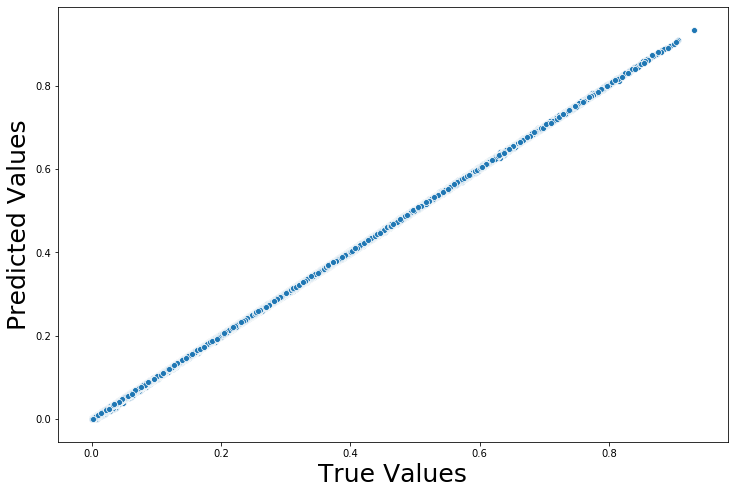

In [100]:
plt.figure(figsize=(12,8))
a = sns.scatterplot(y_test, y_predicted, legend='full')
a.set_xlabel('True Values', fontsize=25)
_ = a.set_ylabel('Predicted Values', fontsize=25)

Text(0.5, 0, 'Error(True-Predicted)')

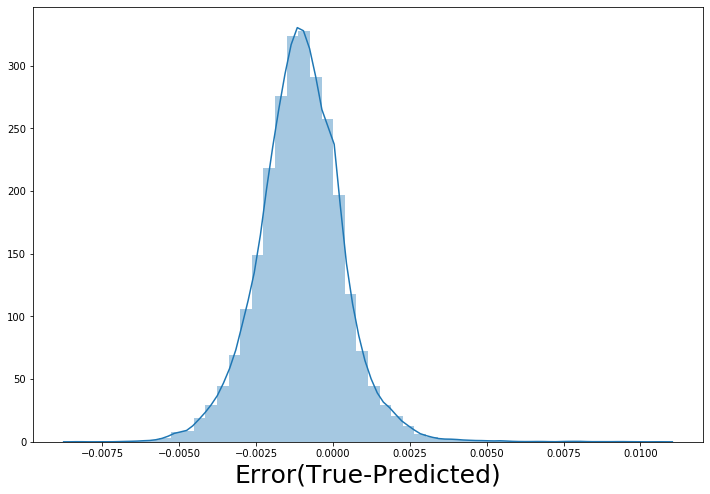

In [105]:
plt.figure(figsize=(12,8))
b = sns.distplot(pd.Series(y_test-y_predicted, name="Error(True-Predicted)"))
b.set_xlabel('Error(True-Predicted)', fontsize=25)
# _ = b.set_ylabel('# of Instances', fontsize=25)


### Save the model

In [80]:
model.save(r'C:\Ankit\PythonProjects\hackathon\DeepLearning\300ksamples.h5', save_format='tf')

In [81]:
from tensorflow.keras.models import load_model

In [82]:
later_model = load_model(r'C:\Ankit\PythonProjects\hackathon\DeepLearning\300ksamples.h5', compile=False)

In [77]:
later_model.predict(X_test).reshape(y_test.shape)

array([0.26643288, 0.32304403, 0.00319494, ..., 0.66573143, 0.5211252 ,
       0.44687313], dtype=float32)

In [78]:
y_predicted

array([0.26643288, 0.32304403, 0.00319494, ..., 0.66573143, 0.5211252 ,
       0.44687313], dtype=float32)

In [35]:
X_test.shape

(60000, 6)

In [36]:
X_test[0].shape

(6,)

In [37]:
X_test[0:1]

array([[0.7821705 , 1.        , 2.52328767, 0.00792332, 0.67824267,
        0.01849439]])

In [38]:
df.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,1.062237,1.0,1.093151,0.005674,0.862692,0.058898,0.408642
1,1.076500,1.0,0.843836,0.020428,0.759562,0.080634,0.337843
2,0.849812,1.0,1.326027,0.019181,0.606436,0.042031,0.187719
3,0.904815,1.0,0.791781,0.028475,0.572696,0.036566,0.146312
4,0.859547,1.0,0.501370,0.009074,0.090578,0.044426,0.000397


In [39]:
later_model.predict(np.array([1.062237, 1.0, 1.093151, 0.005674, 0.862692, 0.058898]).reshape((1,6)))

array([[0.40613532]], dtype=float32)

In [46]:
later_model.predict(np.array([1.0, 1.0, 1, 0.0, 0.2, 0.0]).reshape((1,6)))

array([[0.0799723]], dtype=float32)

In [50]:
df[(df['Stock Price'] > 0.49) & (df['Stock Price'] < 0.51)]

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price


In [56]:
df['Stock Price'].describe()

count    300000.000000
mean          1.031697
std           0.185779
min           0.769231
25%           0.868780
50%           0.999826
75%           1.176731
max           1.428564
Name: Stock Price, dtype: float64